# Evaluador
***

In [11]:
%matplotlib inline

In [12]:
from darkflow.net.build import TFNet
import cv2

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import io

In [14]:
options = {"model": "cfg/yolo-1c.cfg", "load": -1, "threshold": 0.0}

tfnet = TFNet(options)

Parsing cfg/yolo-1c.cfg
Loading None ...
Finished in 0.00012683868408203125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76

In [19]:
img = cv2.imread("./images/2017_5_26_14_392017_5_17_17_59Image_822.jpg")
imgski = io.imread("./images/2017_5_26_14_392017_5_17_17_59Image_822.jpg")

result = tfnet.return_predict(img)
result2 = tfnet.return_predict(imgski)

In [20]:
print("1", result)
print("2", result2)

1 []
2 []


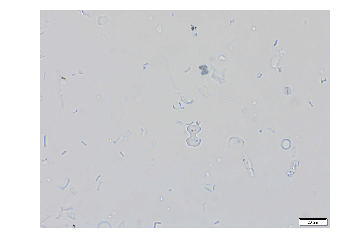

In [17]:
# Mostramos las imagenes resultante
fig, ax = plt.subplots()
fig = plt.figure(figsize=(30, 30))

ax.imshow(img)
ax.axis('off')

for label in result:
    topleft = label['topleft']
    bottomright = label['bottomright']

    height = bottomright['y'] - topleft['y']
    width = bottomright['x'] - topleft['x']

    coord = [topleft['x'], topleft['y'], width, height]

    ax.add_patch(plt.Rectangle((topleft['x'], topleft['y']), width, height, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))
    ax.annotate(label['label'].capitalize(), xy=(topleft['x'], topleft['y']), xytext=(topleft['x'], topleft['y']))